#Imports e dataset

In [ ]:
!pip install networkx

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
import statistics as st

In [ ]:
ds = pd.read_csv('train (1).csv')

In [ ]:
ds.head()

,essay_id,full_text,score
0,000d118,Many people have car where they live. The thin...,3
1,000fe60,I am a scientist at NASA that is discussing th...,3
2,001ab80,People always wish they had the same technolog...,4
3,001bdc0,"We all heard about Venus, the planet without a...",4
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3


#Grafos e suas métricas

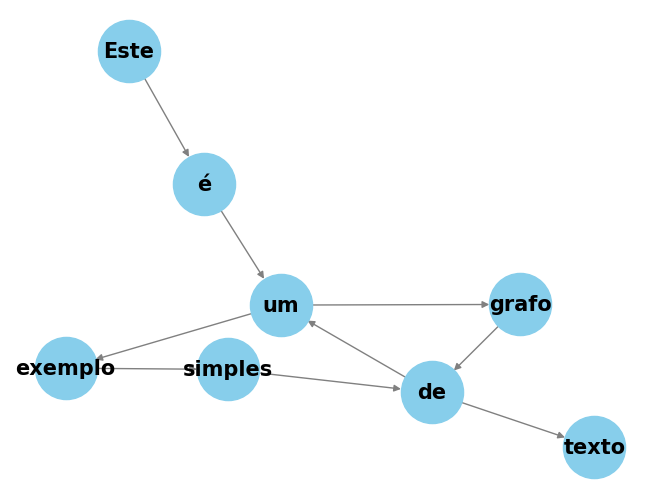

Graus de Entrada dos Nós: {'Este': 0, 'é': 1, 'um': 2, 'exemplo': 1, 'simples': 1, 'de': 2, 'grafo': 1, 'texto': 1}
Graus de Saída dos Nós: {'Este': 1, 'é': 1, 'um': 2, 'exemplo': 1, 'simples': 1, 'de': 2, 'grafo': 1, 'texto': 0}
Centralidade de Grau de Entrada: {'Este': 0.0, 'é': 0.14285714285714285, 'um': 0.2857142857142857, 'exemplo': 0.14285714285714285, 'simples': 0.14285714285714285, 'de': 0.2857142857142857, 'grafo': 0.14285714285714285, 'texto': 0.14285714285714285}
Centralidade de Grau de Saída: {'Este': 0.14285714285714285, 'é': 0.14285714285714285, 'um': 0.2857142857142857, 'exemplo': 0.14285714285714285, 'simples': 0.14285714285714285, 'de': 0.2857142857142857, 'grafo': 0.14285714285714285, 'texto': 0.0}
Centralidade de Intermediação: {'Este': 0.0, 'é': 0.14285714285714285, 'um': 0.42857142857142855, 'exemplo': 0.11904761904761904, 'simples': 0.09523809523809523, 'de': 0.3333333333333333, 'grafo': 0.14285714285714285, 'texto': 0.0}
Centralidade de Proximidade: {'Este': 0.0,

In [ ]:
# Texto de exemplo
texto = "Este é um exemplo simples de um grafo de texto"

# Dividir o texto em palavras
palavras = texto.split()

# Criar um grafo direcionado
G = nx.DiGraph()

# Adicionar nós e arestas
for i in range(len(palavras) - 1):
    G.add_node(palavras[i])
    G.add_node(palavras[i + 1])
    G.add_edge(palavras[i], palavras[i + 1])

# Adicionar o último nó
G.add_node(palavras[-1])

pos = nx.spring_layout(G)  # Posição dos nós
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=15, font_color='black', font_weight='bold', edge_color='gray')
plt.show()

# Calcular métricas específicas para grafos direcionados
graus_entrada = dict(G.in_degree())
graus_saida = dict(G.out_degree())
centralidade_grau_entrada = nx.in_degree_centrality(G)
centralidade_grau_saida = nx.out_degree_centrality(G)
centralidade_intermediacao = nx.betweenness_centrality(G)
centralidade_proximidade = nx.closeness_centrality(G)
centralidade_autovetor = nx.eigenvector_centrality(G)
#comprimento_medio_caminho = nx.average_shortest_path_length(G)
densidade = nx.density(G)
componentes_fortes = list(nx.strongly_connected_components(G))
componentes_fracos = list(nx.weakly_connected_components(G))

# Exibir métricas
print("Graus de Entrada dos Nós:", graus_entrada)
print("Graus de Saída dos Nós:", graus_saida)
print("Centralidade de Grau de Entrada:", centralidade_grau_entrada)
print("Centralidade de Grau de Saída:", centralidade_grau_saida)
print("Centralidade de Intermediação:", centralidade_intermediacao)
print("Centralidade de Proximidade:", centralidade_proximidade)
print("Centralidade de Autovetor:", centralidade_autovetor)
#print("Comprimento Médio do Caminho:", comprimento_medio_caminho)
print("Densidade do Grafo:", densidade)
print("Componentes Fortemente Conectados:", componentes_fortes)
print("Componentes Fracamente Conectados:", componentes_fracos)

Agora vamos ver alguns exemplos de grafos do dataset para ver se há uma diferença tanto na estrutura visual dos grafos quanto nas métricas.

##Nota 1

In [ ]:
nota1 = ds[ds['score'] == 1]

# Sua string de exemplo em inglês
text1 = nota1.iloc[0, 1]

# Tokenizar a string
tokens1 = word_tokenize(text1)

# Remover as stopwords dos tokens
filtered_tokens1 = [word for word in tokens1 if word.lower() not in stop_words]

print(filtered_tokens1)

["''", 'Challenge', 'Exploring', 'Venus', "''", 'informative', 'text', ',', 'Venus', 'called', '``', 'Evening', 'Star', "''", 'one', 'brightest', 'point', 'light', 'night', 'sky', ',', 'solar', 'systen', 'Venus', 'secont', 'sun', ';', 'Earth', "'s", 'twin', 'Venus', 'teh', 'close', 'planet', 'Earth', ',', 'occasionally', 'closest', 'distance', 'Earth', ',', 'Venus', ',', 'Mars', '.', 'First', ',', 'Venus', 'hot', 'planet', ',', 'Venus', 'somre', 'persent', 'carbon', 'dioxide', ',', 'Venus', 'closer', 'sumfor', 'reason', 'Venus', 'hottest', 'surface', 'temperature', 'planet', 'iur', 'solar', 'system', '.', 'temoperature', '800', 'degrees', 'fahrenheit', ',', 'atmosphere', 'presure', '90', 'times', 'greater', 'experience', 'planet', ',', 'people', 'ca', "n't", 'survive', '.', 'Secondly', ',', 'scientifict', 'However', ',', 'peering', 'Venus', 'ship', 'orbiting', 'hovering', 'safely', 'far', 'planet', 'povide', 'limited', 'insight', 'ground', 'conditions', 'However', 'light', 'penetrate',

In [ ]:
# Criar um grafo direcionado
G1 = nx.DiGraph()

# Adicionar nós e arestas
for i in range(len(filtered_tokens1) - 1):
    G1.add_node(filtered_tokens1[i])
    G1.add_node(filtered_tokens1[i + 1])
    G1.add_edge(filtered_tokens1[i], filtered_tokens1[i + 1])

# Adicionar o último nó
G1.add_node(filtered_tokens1[-1])

# Calcular métricas específicas para grafos direcionados
graus_entrada1 = dict(G1.in_degree())
graus_saida1 = dict(G1.out_degree())
centralidade_grau_entrada1 = nx.in_degree_centrality(G1)
centralidade_grau_saida1 = nx.out_degree_centrality(G1)
centralidade_intermediacao1 = nx.betweenness_centrality(G1)
centralidade_proximidade1 = nx.closeness_centrality(G1)
centralidade_autovetor1 = nx.eigenvector_centrality(G1)
#comprimento_medio_caminho1 = nx.average_shortest_path_length(G1)
densidade1 = nx.density(G1)
componentes_fortes1 = list(nx.strongly_connected_components(G1))
componentes_fracos1 = list(nx.weakly_connected_components(G1))

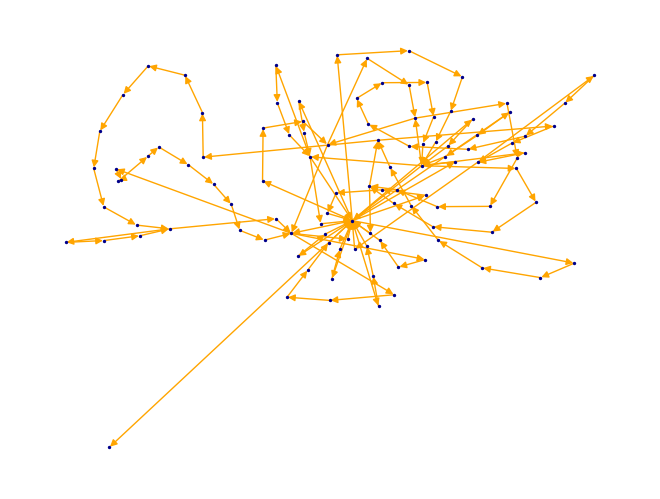

In [ ]:
pos1 = nx.spring_layout(G1)  # Posição dos nós
nx.draw(G1, pos1, with_labels=False, node_color='darkblue', node_size=2, font_size=15, font_color='black', font_weight='bold', edge_color='orange')
plt.show()

In [ ]:
print("Graus de Entrada dos Nós:", graus_entrada1)
print('---------------------------------------------')
print("Graus de Saída dos Nós:", graus_saida1)
print('---------------------------------------------')
print("Centralidade de Grau de Entrada:", centralidade_grau_entrada1)
print('---------------------------------------------')
print("Centralidade de Grau de Saída:", centralidade_grau_saida1)
print('---------------------------------------------')
print("Centralidade de Intermediação:", centralidade_intermediacao1)
print('---------------------------------------------')
print("Centralidade de Proximidade:", centralidade_proximidade1)
print('---------------------------------------------')
print("Centralidade de Autovetor:", centralidade_autovetor1)
print('---------------------------------------------')
#print("Comprimento Médio do Caminho:", comprimento_medio_caminho1)
print("Densidade do Grafo:", densidade1)
print('---------------------------------------------')
print("Componentes Fortemente Conectados:", componentes_fortes1)
print('---------------------------------------------')
print("Componentes Fracamente Conectados:", componentes_fracos1)

Graus de Entrada dos Nós: {'Challenge': 1, 'Exploring': 1, 'Venus': 12, 'informative': 1, 'text': 1, 'called': 1, 'Evening': 1, 'Star': 1, 'one': 1, 'brightest': 1, 'point': 1, 'light': 2, 'night': 1, 'sky': 1, 'solar': 2, 'systen': 1, 'secont': 1, 'sun': 1, 'Earth': 3, 'twin': 1, 'teh': 1, 'close': 1, 'planet': 5, 'occasionally': 1, 'closest': 1, 'distance': 1, 'Mars': 1, 'First': 1, 'hot': 1, 'somre': 1, 'persent': 1, 'carbon': 1, 'dioxide': 1, 'closer': 1, 'sumfor': 1, 'reason': 1, 'hottest': 1, 'surface': 1, 'temperature': 1, 'iur': 1, 'system': 1, 'temoperature': 1, '800': 1, 'degrees': 1, 'fahrenheit': 1, 'atmosphere': 1, 'presure': 1, '90': 1, 'times': 1, 'greater': 1, 'experience': 1, 'people': 2, 'ca': 1, "n't": 1, 'survive': 1, 'Secondly': 1, 'scientifict': 1, 'However': 2, 'peering': 1, 'ship': 1, 'orbiting': 1, 'hovering': 1, 'safely': 1, 'far': 1, 'povide': 1, 'limited': 1, 'insight': 1, 'ground': 1, 'conditions': 1, 'penetrate': 1, 'th': 1, 'eatmosphere': 1, 'photography'

##Nota 3

In [ ]:
#Separando o dataset
nota3 = ds[ds['score'] == 3]

# Sua string de exemplo em inglês
text3 = nota3.iloc[0, 1]

# Tokenizar a string
tokens3 = word_tokenize(text3)

# Remover as stopwords dos tokens
filtered_tokens3 = [word for word in tokens3 if word.lower() not in stop_words]

print(filtered_tokens3)

['Many', 'people', 'car', 'live', '.', 'thing', "n't", 'know', 'use', 'car', 'alot', 'thing', 'happen', 'like', 'get', 'accidet', 'smoke', 'car', 'bad', 'breath', 'someone', 'walk', 'VAUBAN', ',', 'Germany', 'dont', 'proble', '70', 'percent', 'vauban', "'s", 'families', 'cars', ',', '57', 'percent', 'sold', 'car', 'move', '.', 'Street', 'parkig', ',', 'driveways', 'home', 'garages', 'forbidden', 'outskirts', 'freiburd', 'near', 'French', 'Swiss', 'borders', '.', 'probaly', 'wo', "n't", 'see', 'car', 'Vauban', "'s", 'streets', 'completely', '``', 'car', 'free', "''", 'lives', 'VAUBAN', 'owns', 'car', 'ownership', 'allowed', ',', 'two', 'places', 'park', 'large', 'garages', 'edge', 'development', ',', 'car', 'owner', 'buys', 'space', 'cheap', 'buy', 'one', 'sell', 'space', 'car', '$', '40,000', 'along', 'home', '.', 'vauban', 'people', 'completed', '2006', ',', 'said', 'example', 'growing', 'trend', 'Europe', ',', 'untile', 'states', 'else', 'suburban', 'life', 'auto', 'use', 'called', '

In [ ]:
# Criar um grafo direcionado
G3 = nx.DiGraph()

# Adicionar nós e arestas
for i in range(len(filtered_tokens3) - 1):
    G3.add_node(filtered_tokens3[i])
    G3.add_node(filtered_tokens3[i + 1])
    G3.add_edge(filtered_tokens3[i], filtered_tokens3[i + 1])

# Adicionar o último nó
G3.add_node(filtered_tokens3[-1])

# Calcular métricas específicas para grafos direcionados
graus_entrada3 = dict(G3.in_degree())
graus_saida3 = dict(G3.out_degree())
centralidade_grau_entrada3 = nx.in_degree_centrality(G3)
centralidade_grau_saida3 = nx.out_degree_centrality(G3)
centralidade_intermediacao3 = nx.betweenness_centrality(G3)
centralidade_proximidade3 = nx.closeness_centrality(G3)
centralidade_autovetor3 = nx.eigenvector_centrality(G3)
#comprimento_medio_caminho3 = nx.average_shortest_path_length(G3)
densidade3 = nx.density(G3)
componentes_fortes3 = list(nx.strongly_connected_components(G3))
componentes_fracos3 = list(nx.weakly_connected_components(G3))

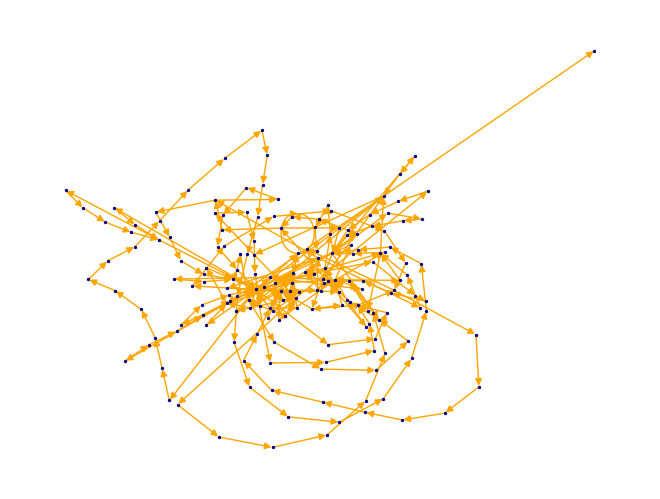

In [ ]:
pos = nx.spring_layout(G3)  # Posição dos nós
nx.draw(G3, pos, with_labels=False, node_color='darkblue', node_size=2, font_size=15, font_color='black', font_weight='bold', edge_color='orange')
plt.show()

In [ ]:
print("Graus de Entrada dos Nós:", graus_entrada3)
print('---------------------------------------------')
print("Graus de Saída dos Nós:", graus_saida3)
print('---------------------------------------------')
print("Centralidade de Grau de Entrada:", centralidade_grau_entrada3)
print('---------------------------------------------')
print("Centralidade de Grau de Saída:", centralidade_grau_saida3)
print('---------------------------------------------')
print("Centralidade de Intermediação:", centralidade_intermediacao3)
print('---------------------------------------------')
print("Centralidade de Proximidade:", centralidade_proximidade3)
print('---------------------------------------------')
print("Centralidade de Autovetor:", centralidade_autovetor3)
print('---------------------------------------------')
#print("Comprimento Médio do Caminho:", comprimento_medio_caminho)
print("Densidade do Grafo:", densidade3)
print('---------------------------------------------')
print("Componentes Fortemente Conectados:", componentes_fortes3)
print('---------------------------------------------')
print("Componentes Fracamente Conectados:", componentes_fracos3)

Graus de Entrada dos Nós: {'Many': 0, 'people': 5, 'car': 12, 'live': 1, 'thing': 3, 'know': 1, 'use': 4, 'alot': 3, 'happen': 1, 'like': 1, 'get': 1, 'accidet': 1, 'smoke': 1, 'bad': 1, 'breath': 1, 'someone': 1, 'walk': 3, 'VAUBAN': 4, 'Germany': 1, 'dont': 1, 'proble': 1, '70': 1, 'percent': 6, 'vauban': 2, 'families': 1, 'cars': 5, '57': 1, 'sold': 1, 'move': 1, 'Street': 1, 'parkig': 1, 'driveways': 1, 'home': 2, 'garages': 2, 'forbidden': 1, 'outskirts': 1, 'freiburd': 1, 'near': 1, 'French': 1, 'Swiss': 1, 'borders': 1, 'probaly': 1, 'wo': 1, 'see': 2, 'Vauban': 1, 'streets': 1, 'completely': 1, 'free': 1, 'lives': 1, 'owns': 1, 'ownership': 1, 'allowed': 1, 'two': 1, 'places': 1, 'park': 1, 'large': 1, 'edge': 1, 'development': 2, 'owner': 1, 'buys': 1, 'space': 2, 'cheap': 1, 'buy': 1, 'one': 1, 'sell': 1, '$': 1, '40,000': 1, 'along': 1, 'completed': 1, '2006': 1, 'said': 3, 'example': 1, 'growing': 1, 'trend': 1, 'Europe': 2, 'untile': 1, 'states': 2, 'else': 1, 'suburban': 

##Nota 6

In [ ]:
#Separando o dataset
nota6 = ds[ds['score'] == 6]

# Sua string de exemplo em inglês
text6 = nota6.iloc[0, 1]

# Tokenizar a string
tokens6 = word_tokenize(text6)

# Remover as stopwords dos tokens
filtered_tokens6 = [word for word in tokens6 if word.lower() not in stop_words]

print(filtered_tokens6)

['Dear', ',', 'Senator', 'Electoral', 'college', 'around', 'centuries', 'time', 'changes', ',', 'things', 'start', 'evolve', 'grow', 'along', 'time', 'period', '.', 'things', 'meant', 'changed', 'according', 'lifestyle', 'people', '.', 'Hundreds', 'years', 'back', ',', 'electoral', 'college', 'might', 'worked', 'citizens', 'living', 'time', '.', 'However', ',', 'new', 'century', 'many', 'people', 'agree', 'fact', 'electoral', 'college', 'dated', 'need', 'change', 'election', 'popular', 'vote', '.', 'Firstly', ',', 'people', 'putting', 'vote', 'hands', 'person', 'might', 'even', 'consider', 'votes', 'state', "'s", 'people', '.', 'Also', ',', 'electoral', 'college', 'causes', 'many', 'issues', 'duing', 'voting', 'period', '.', 'start', ',', 'electoral', 'college', 'huge', 'risk', 'state', "'s", 'people', 'must', 'take', 'year', '.', 'never', 'know', 'whether', 'electors', 'suddenly', 'change', 'mind', 'vote', 'candidate', 'personally', "n't", 'want', '.', 'article', '``', 'indefensible',

In [ ]:
# Criar um grafo direcionado
G6 = nx.DiGraph()

# Adicionar nós e arestas
for i in range(len(filtered_tokens6) - 1):
    G6.add_node(filtered_tokens6[i])
    G6.add_node(filtered_tokens6[i + 1])
    G6.add_edge(filtered_tokens6[i], filtered_tokens6[i + 1])

# Adicionar o último nó
G6.add_node(filtered_tokens6[-1])

# Calcular métricas específicas para grafos direcionados
graus_entrada6 = dict(G6.in_degree())
graus_saida6 = dict(G6.out_degree())
centralidade_grau_entrada6 = nx.in_degree_centrality(G6)
centralidade_grau_saida6 = nx.out_degree_centrality(G6)
centralidade_intermediacao6 = nx.betweenness_centrality(G6)
centralidade_proximidade6 = nx.closeness_centrality(G6)
centralidade_autovetor6 = nx.eigenvector_centrality(G6)
#comprimento_medio_caminho6 = nx.average_shortest_path_length(G6)
densidade6 = nx.density(G6)
componentes_fortes6 = list(nx.strongly_connected_components(G6))
componentes_fracos6 = list(nx.weakly_connected_components(G6))

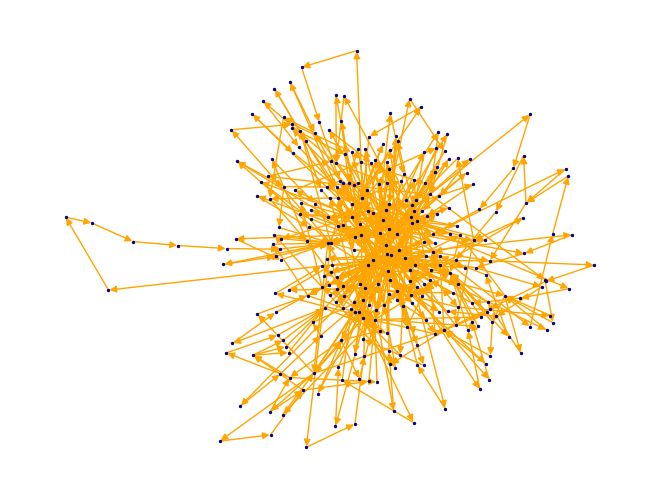

In [ ]:
pos = nx.spring_layout(G6)  # Posição dos nós
nx.draw(G6, pos, with_labels=False, node_color='darkblue', node_size=2, font_size=15, font_color='black', font_weight='bold', edge_color='orange')
plt.show()

In [ ]:
print("Graus de Entrada dos Nós:", graus_entrada6)
print('---------------------------------------------')
print("Graus de Saída dos Nós:", graus_saida6)
print('---------------------------------------------')
print("Centralidade de Grau de Entrada:", centralidade_grau_entrada6)
print('---------------------------------------------')
print("Centralidade de Grau de Saída:", centralidade_grau_saida6)
print('---------------------------------------------')
print("Centralidade de Intermediação:", centralidade_intermediacao6)
print('---------------------------------------------')
print("Centralidade de Proximidade:", centralidade_proximidade6)
print('---------------------------------------------')
print("Centralidade de Autovetor:", centralidade_autovetor6)
print('---------------------------------------------')
#print("Comprimento Médio do Caminho:", comprimento_medio_caminho)
print("Densidade do Grafo:", densidade6)
print('---------------------------------------------')
print("Componentes Fortemente Conectados:", componentes_fortes6)
print('---------------------------------------------')
print("Componentes Fracamente Conectados:", componentes_fracos6)

Graus de Entrada dos Nós: {'Dear': 0, ',': 25, 'Senator': 1, 'Electoral': 1, 'college': 3, 'around': 1, 'centuries': 1, 'time': 6, 'changes': 1, 'things': 2, 'start': 2, 'evolve': 1, 'grow': 1, 'along': 2, 'period': 2, '.': 27, 'meant': 1, 'changed': 4, 'according': 1, 'lifestyle': 1, 'people': 8, 'Hundreds': 1, 'years': 2, 'back': 2, 'electoral': 12, 'might': 6, 'worked': 1, 'citizens': 2, 'living': 1, 'However': 1, 'new': 5, 'century': 1, 'many': 4, 'agree': 1, 'fact': 1, 'dated': 1, 'need': 1, 'change': 5, 'election': 7, 'popular': 4, 'vote': 12, 'Firstly': 1, 'putting': 1, 'hands': 1, 'person': 1, 'even': 3, 'consider': 2, 'votes': 6, 'state': 7, "'s": 7, 'Also': 1, 'causes': 1, 'issues': 1, 'duing': 1, 'voting': 1, 'huge': 1, 'risk': 1, 'must': 1, 'take': 1, 'year': 1, 'never': 2, 'know': 1, 'whether': 1, 'electors': 8, 'suddenly': 1, 'mind': 1, 'candidate': 10, 'personally': 1, "n't": 3, 'want': 5, 'article': 3, '``': 7, 'indefensible': 1, ':': 1, 'best-laid': 1, 'defenses': 1, '

#Testagem de features

Durante os testes, percebi que a correlação entre as métricas e a nossa target (score) aumentava se não tirassemos as stopwords. Assim, decidi deixar o texto o mais cru possível.

In [ ]:
def pre_proc(texto):
    # Tokenizar a string
    tokens = word_tokenize(texto)

    # Carregar as stopwords em inglês
    '''stopwords = nltk.corpus.stopwords.words('english')
    stopwords.append("''")
    stopwords.append("``")
    stopwords.append("n't")
    stopwords.append("'s")
    stopwords.append(",")
    stopwords.append(";")
    stopwords.append(".")
    stop_words = set(stopwords)'''

    '''if word.lower() not in stop_words'''

    # Remover as stopwords dos tokens
    filtered_tokens = [word for word in tokens]

    return filtered_tokens

In [ ]:
ds = pd.read_csv('train (1).csv')
ds['full_text'] = ds['full_text'].apply(pre_proc)

###Densidade

In [ ]:
def calcular_densidade(texto):
    # Criar um grafo direcionado
    G = nx.DiGraph()

    # Adicionar nós e arestas
    for i in range(len(texto) - 1):
        G.add_node(texto[i])
        G.add_node(texto[i + 1])
        G.add_edge(texto[i], texto[i + 1])

    # Adicionar o último nó
    G.add_node(texto[-1])

    # Calcular a densidade do grafo
    densidade = nx.density(G)

    return densidade

In [ ]:
# Aplicar a função ao dataframe e criar uma nova coluna 'densidade'
ds['densidade'] = ds['full_text'].apply(calcular_densidade)

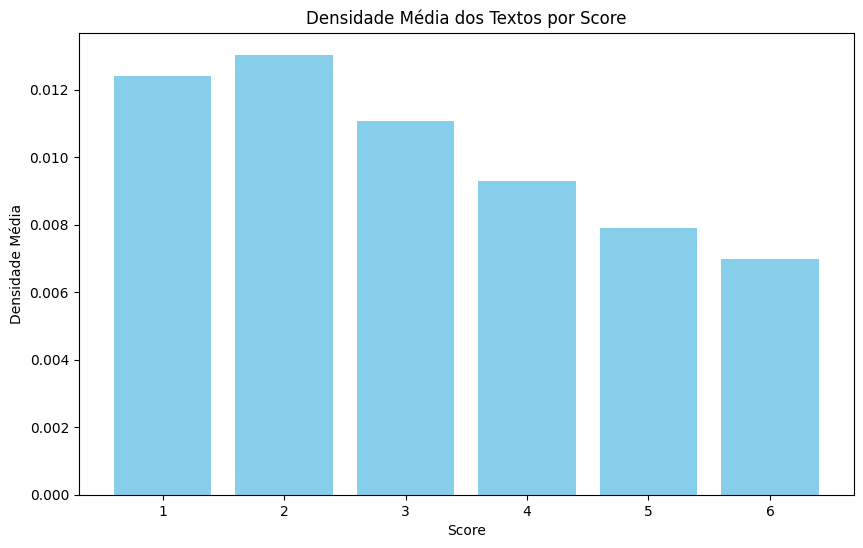

In [ ]:
# Sem stopwords
# Agrupar por 'score' e calcular a densidade média
densidade_media_por_score = ds.groupby('score')['densidade'].mean().reset_index()

# Visualizar os resultados
plt.figure(figsize=(10, 6))
plt.bar(densidade_media_por_score['score'], densidade_media_por_score['densidade'], color='skyblue')
plt.xlabel('Score')
plt.ylabel('Densidade Média')
plt.title('Densidade Média dos Textos por Score')
plt.xticks(densidade_media_por_score['score'])
plt.show()

<Axes: >

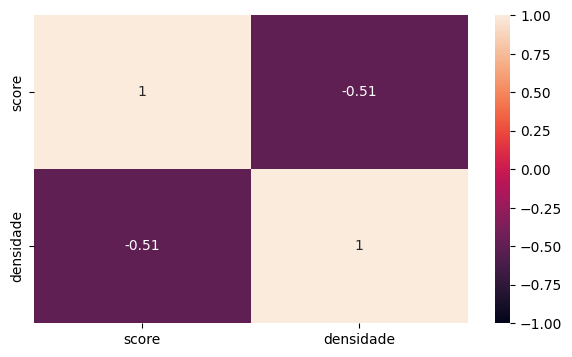

In [ ]:
#Sem stopwords
plt.figure(figsize=[7,4])
sns.heatmap(ds.drop(['essay_id', 'full_text'], axis=1).corr(), annot=True, vmin=-1, vmax=1)

###Grau de entrada

In [ ]:
ds = ds.drop(['essay_id'], axis=1)

In [ ]:
def calcular_grau_entrada(texto):
    # Criar um grafo direcionado
    G = nx.DiGraph()

    # Adicionar nós e arestas
    for i in range(len(texto) - 1):
        G.add_node(texto[i])
        G.add_node(texto[i + 1])
        G.add_edge(texto[i], texto[i + 1])

    # Adicionar o último nó
    G.add_node(texto[-1])

    # Calcular os graus de entrada dos nodos
    graus_entrada = dict(G.in_degree())

    #Obter os valores do dicionário
    grau_entrada = list(graus_entrada.values())

    return grau_entrada

In [ ]:
ds['grau_entrada'] = ds['full_text'].apply(calcular_grau_entrada)

In [ ]:
ds['media_ge'] = ds['grau_entrada'].apply(st.mean)
#ds['mediana_ge'] = ds['grau_entrada'].apply(st.median)
#ds['min_ge'] = ds['grau_entrada'].apply(min)
ds['max_ge'] = ds['grau_entrada'].apply(max)

<Axes: >

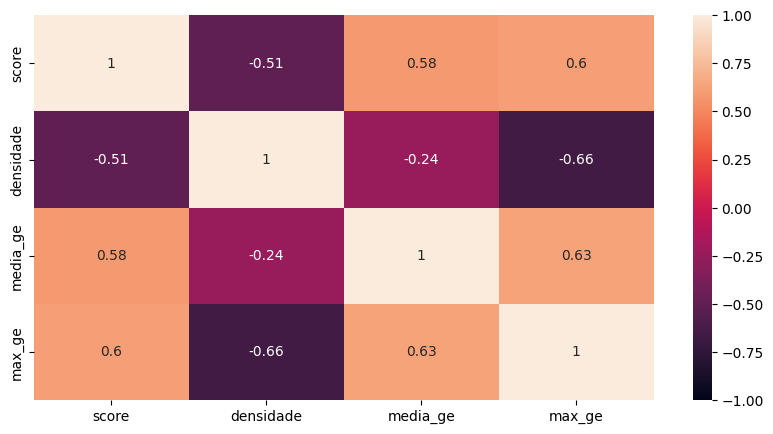

In [ ]:
#Sem stopwords
plt.figure(figsize=[10,5])
sns.heatmap(ds.drop(['grau_entrada', 'full_text'], axis=1).corr(), annot=True, vmin=-1, vmax=1)

###Grau de saída

In [ ]:
ds = ds.drop(['grau_entrada'], axis=1)

In [ ]:
def calcular_grau_saida(texto):
  # Criar um grafo direcionado
  G = nx.DiGraph()

  # Adicionar nós e arestas
  for i in range(len(texto) - 1):
      G.add_node(texto[i])
      G.add_node(texto[i + 1])
      G.add_edge(texto[i], texto[i + 1])

  # Adicionar o último nó
  G.add_node(texto[-1])

  # Calcular os graus de entrada dos nodos
  graus_saida = dict(G.out_degree())

  #Obter os valores do dicionário
  grau_saida = list(graus_saida.values())

  return grau_saida

In [ ]:
ds['grau_saida'] = ds['full_text'].apply(calcular_grau_saida)

In [ ]:
ds['media_gs'] = ds['grau_saida'].apply(st.mean)
#ds['mediana_gs'] = ds['grau_saida'].apply(st.median)
#ds['min_gs'] = ds['grau_saida'].apply(min)
ds['max_gs'] = ds['grau_saida'].apply(max)

<Axes: >

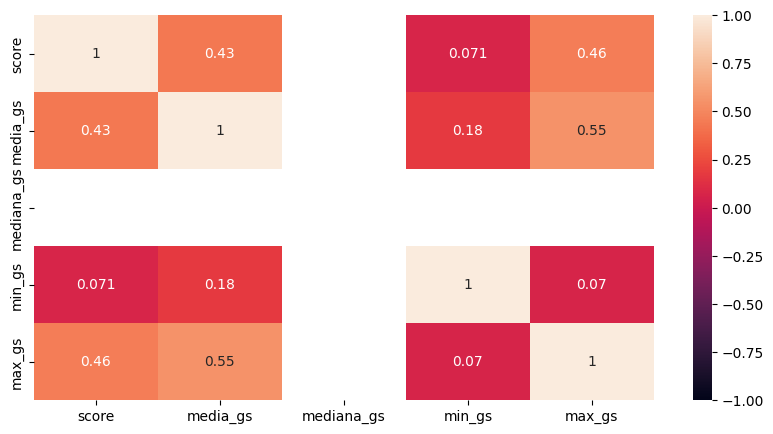

In [ ]:
#Mais stopwords
plt.figure(figsize=[10,5])
sns.heatmap(ds.drop(['grau_saida', 'full_text'], axis=1).corr(), annot=True, vmin=-1, vmax=1)

<Axes: >

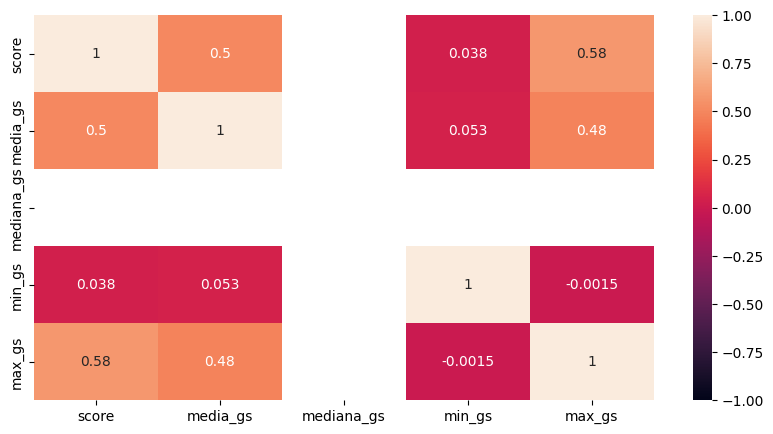

In [ ]:
plt.figure(figsize=[10,5])
sns.heatmap(ds.drop(['grau_saida', 'full_text'], axis=1).corr(), annot=True, vmin=-1, vmax=1)

<Axes: >

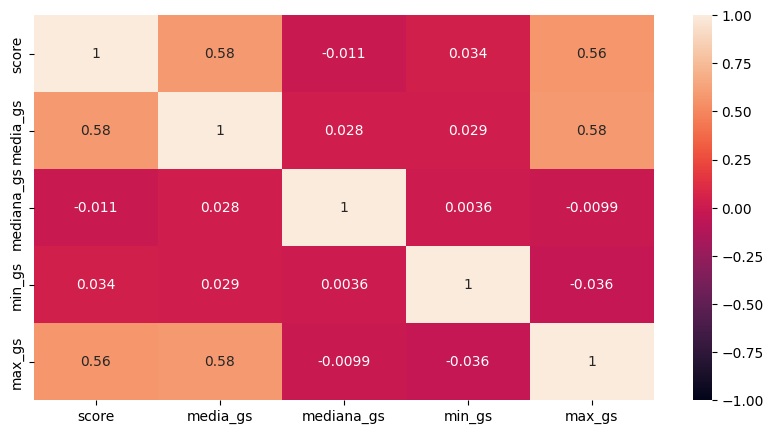

In [ ]:
#Sem stopwords
plt.figure(figsize=[10,5])
sns.heatmap(ds.drop(['grau_saida', 'full_text'], axis=1).corr(), annot=True, vmin=-1, vmax=1)

###Centralidade grau de entrada

In [ ]:
ds = ds.drop(['grau_saida'], axis=1)

In [ ]:
def calc_cge(texto):
  # Criar um grafo direcionado
  G = nx.DiGraph()

  # Adicionar nós e arestas
  for i in range(len(texto) - 1):
      G.add_node(texto[i])
      G.add_node(texto[i + 1])
      G.add_edge(texto[i], texto[i + 1])

  # Adicionar o último nó
  G.add_node(texto[-1])

  # Calcular os graus de entrada dos nodos
  centralidade_grau_entrada = nx.in_degree_centrality(G)

  #Obter os valores do dicionário
  cge = list(centralidade_grau_entrada.values())

  return cge

In [ ]:
ds['cge'] = ds['full_text'].apply(calc_cge)

In [ ]:
ds['media_cge'] = ds['cge'].apply(st.mean)
ds['mediana_cge'] = ds['cge'].apply(st.median)
#ds['min_cge'] = ds['cge'].apply(min)
#ds['max_cge'] = ds['cge'].apply(max)

<Axes: >

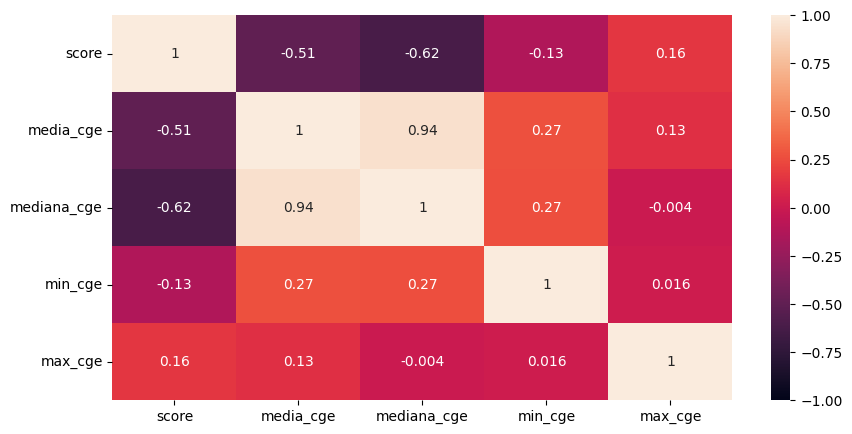

In [ ]:
plt.figure(figsize=[10,5])
sns.heatmap(ds.drop(['full_text', 'cge'], axis=1).corr(), annot=True, vmin=-1, vmax=1)

<Axes: >

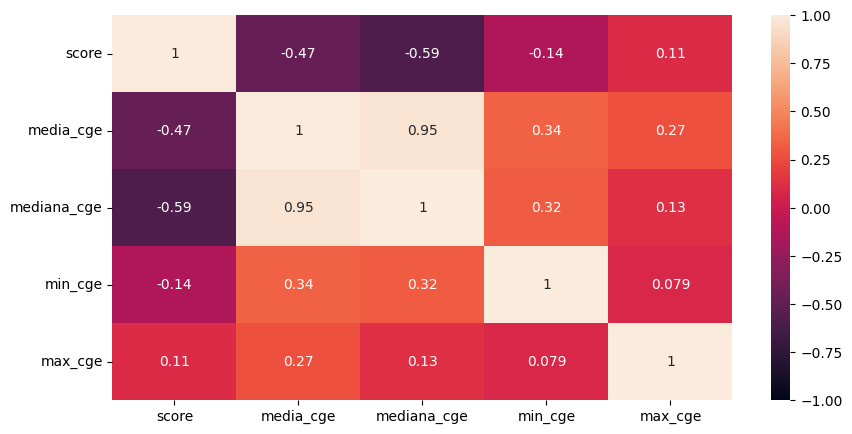

In [ ]:
plt.figure(figsize=[10,5])
sns.heatmap(ds.drop(['essay_id', 'full_text', 'cge'], axis=1).corr(), annot=True, vmin=-1, vmax=1)

###Centralidade grau de saida

In [ ]:
ds = ds.drop(['cge'], axis=1)

In [ ]:
def calc_cgs(texto):
  # Criar um grafo direcionado
  G = nx.DiGraph()

  # Adicionar nós e arestas
  for i in range(len(texto) - 1):
      G.add_node(texto[i])
      G.add_node(texto[i + 1])
      G.add_edge(texto[i], texto[i + 1])

  # Adicionar o último nó
  G.add_node(texto[-1])

  # Calcular os graus de entrada dos nodos
  centralidade_grau_saida = nx.out_degree_centrality(G)

  #Obter os valores do dicionário
  cgs = list(centralidade_grau_saida.values())

  return cgs

In [ ]:
ds['cgs'] = ds['full_text'].apply(calc_cgs)

In [ ]:
ds['media_cgs'] = ds['cgs'].apply(st.mean)
ds['mediana_cgs'] = ds['cgs'].apply(st.median)
ds['min_cgs'] = ds['cgs'].apply(min)
#ds['max_cgs'] = ds['cgs'].apply(max)

<Axes: >

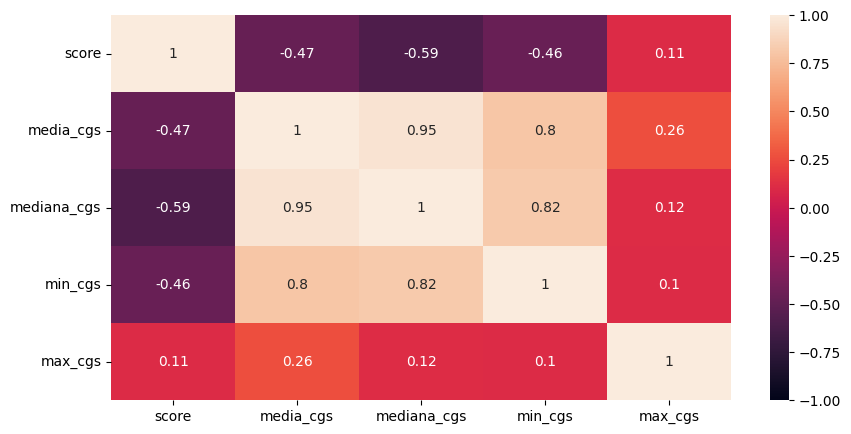

In [ ]:
plt.figure(figsize=[10,5])
sns.heatmap(ds.drop(['essay_id', 'full_text', 'cgs'], axis=1).corr(), annot=True, vmin=-1, vmax=1)

<Axes: >

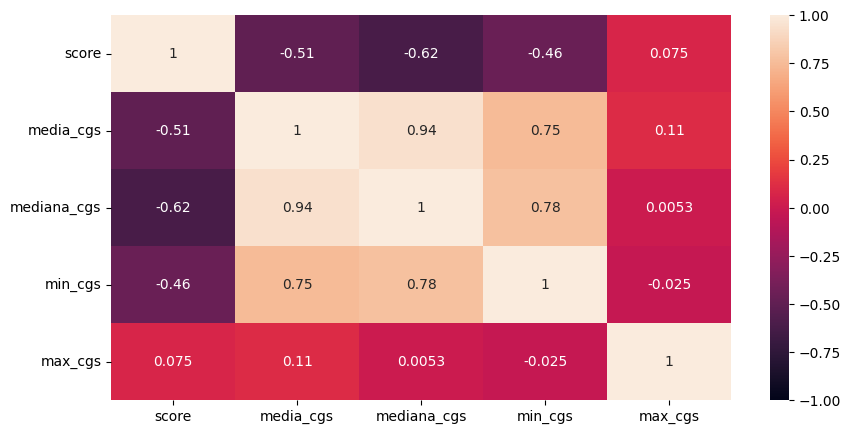

In [ ]:
#Sem stopwords
plt.figure(figsize=[10,5])
sns.heatmap(ds.drop(['full_text', 'cgs'], axis=1).corr(), annot=True, vmin=-1, vmax=1)

###Centralidade de intermediação

In [ ]:
ds = ds.drop(['cgs'], axis=1)

In [ ]:
def calc_ci(texto):
  # Criar um grafo direcionado
  G = nx.DiGraph()

  # Adicionar nós e arestas
  for i in range(len(texto) - 1):
      G.add_node(texto[i])
      G.add_node(texto[i + 1])
      G.add_edge(texto[i], texto[i + 1])

  # Adicionar o último nó
  G.add_node(texto[-1])

  # Calcular os graus de entrada dos nodos
  centralidade_intermediacao = nx.betweenness_centrality(G)

  #Obter os valores do dicionário
  ci = list(centralidade_intermediacao.values())

  return ci

In [ ]:
ds['ci'] = ds['full_text'].apply(calc_ci)#Só avisando q leva 30 min p/ rodar essa merda kkkk

In [ ]:
ds['media_ci'] = ds['ci'].apply(st.mean)
ds['mediana_ci'] = ds['ci'].apply(st.median)
#ds['min_ci'] = ds['ci'].apply(min)
#ds['max_ci'] = ds['ci'].apply(max)

<Axes: >

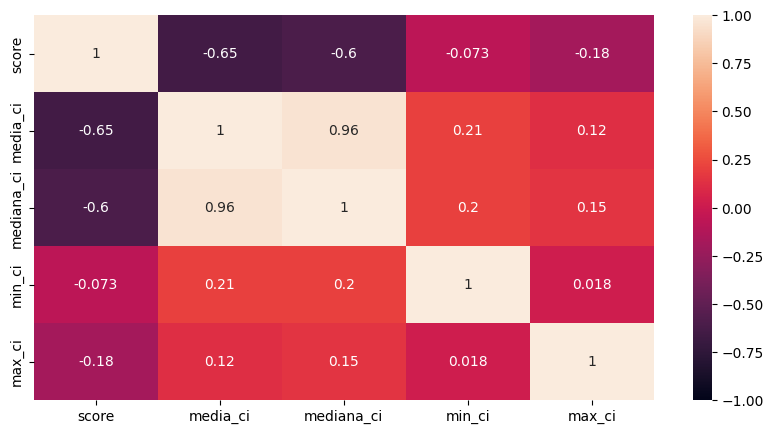

In [ ]:
plt.figure(figsize=[10,5])
sns.heatmap(ds.drop(['essay_id', 'full_text', 'ci'], axis=1).corr(), annot=True, vmin=-1, vmax=1)

<Axes: >

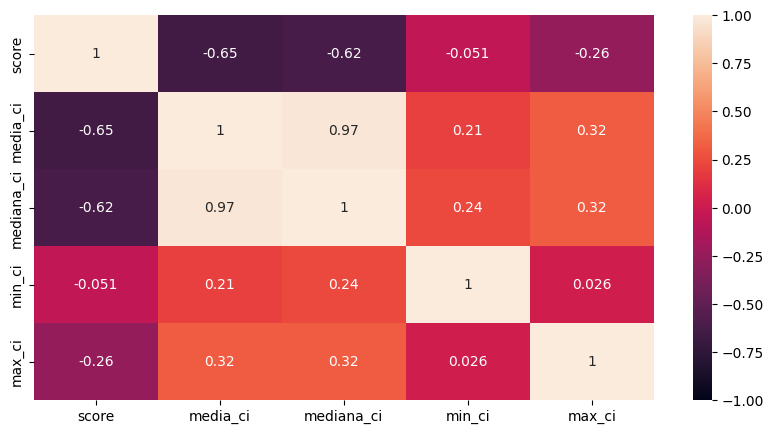

In [ ]:
#Sem stopwords
plt.figure(figsize=[10,5])
sns.heatmap(ds.drop(['full_text', 'ci'], axis=1).corr(), annot=True, vmin=-1, vmax=1)

###Centralidade de proximidade

In [ ]:
ds = ds.drop(['ci'], axis=1)

In [ ]:
def calc_cp(texto):
  # Criar um grafo direcionado
  G = nx.DiGraph()

  # Adicionar nós e arestas
  for i in range(len(texto) - 1):
      G.add_node(texto[i])
      G.add_node(texto[i + 1])
      G.add_edge(texto[i], texto[i + 1])

  # Adicionar o último nó
  G.add_node(texto[-1])

  # Calcular os graus de entrada dos nodos
  centralidade_proximidade = nx.closeness_centrality(G)

  #Obter os valores do dicionário
  cp = list(centralidade_proximidade.values())

  return cp

In [ ]:
ds['cp'] = ds['full_text'].apply(calc_cp)#Demora 30min tbm kk

In [ ]:
ds['media_cp'] = ds['cp'].apply(st.mean)
#ds['mediana_cp'] = ds['cp'].apply(st.median)
#ds['min_cp'] = ds['cp'].apply(min)
#ds['max_cp'] = ds['cp'].apply(max)

<Axes: >

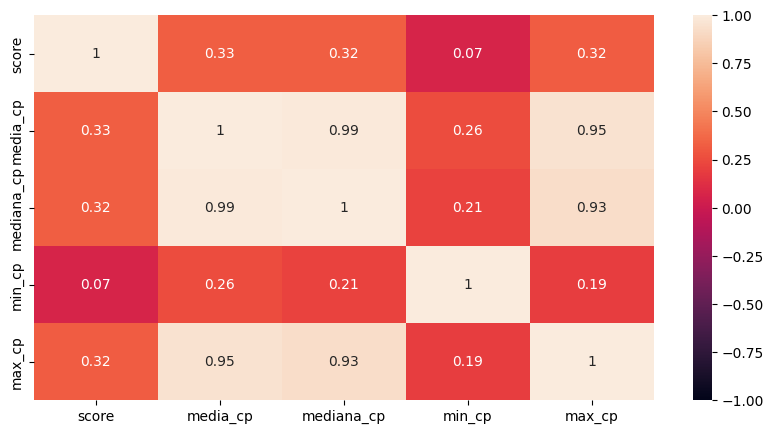

In [ ]:
plt.figure(figsize=[10,5])
sns.heatmap(ds.drop(['essay_id', 'full_text', 'cp'], axis=1).corr(), annot=True, vmin=-1, vmax=1)

<Axes: >

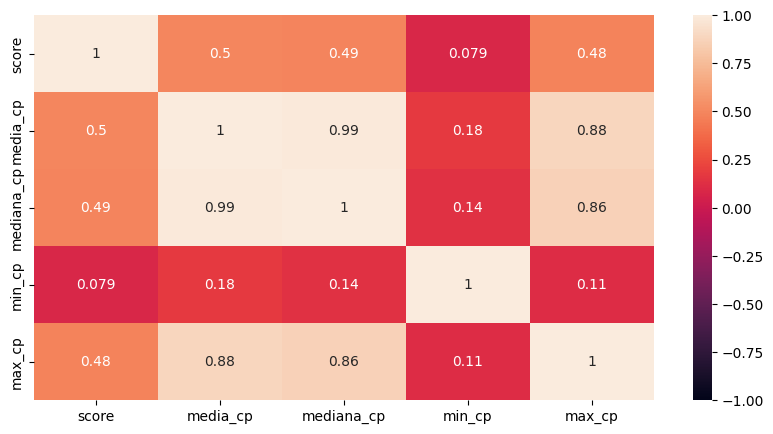

In [ ]:
#Sem stopwords
plt.figure(figsize=[10,5])
sns.heatmap(ds.drop(['full_text', 'cp'], axis=1).corr(), annot=True, vmin=-1, vmax=1)

###Centralidade de autovetor

In [ ]:
ds = ds.drop(['cp'], axis=1)

In [ ]:
def calc_ca(texto):
  # Criar um grafo direcionado
  G = nx.DiGraph()

  # Adicionar nós e arestas
  for i in range(len(texto) - 1):
      G.add_node(texto[i])
      G.add_node(texto[i + 1])
      G.add_edge(texto[i], texto[i + 1])

  # Adicionar o último nó
  G.add_node(texto[-1])

  # Calcular os graus de entrada dos nodos
  centralidade_autovetor = nx.eigenvector_centrality(G, max_iter=200)

  #Obter os valores do dicionário
  ca = list(centralidade_autovetor.values())

  return ca

In [ ]:
outlier = ds[ds['tamanho'] > 1600]
outlier

,full_text,score,tamanho
2155,"[I, thought, it, might, be, boring, and, a, lo...",2,1740


In [ ]:
ds = ds.drop(2155)
ds = ds.reset_index()

In [ ]:
ds['ca'] = ds['full_text'].apply(calc_ca)

In [ ]:
ds['media_ca'] = ds['ca'].apply(st.mean)
#ds['mediana_ca'] = ds['ca'].apply(st.median)
#ds['min_ca'] = ds['ca'].apply(min)
#ds['max_ca'] = ds['ca'].apply(max)

<Axes: >

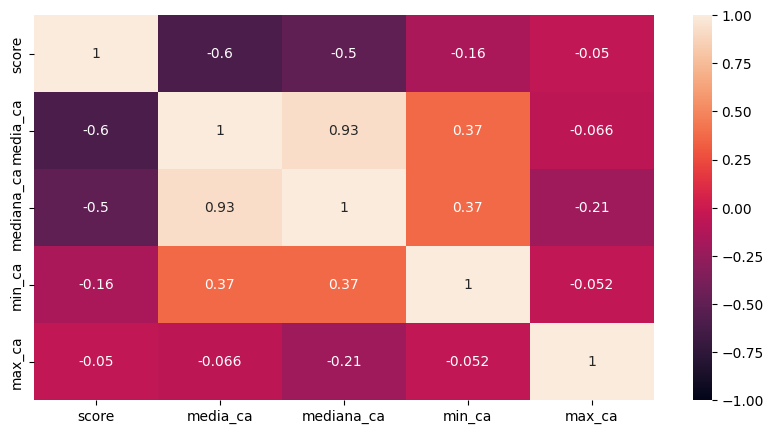

In [ ]:
plt.figure(figsize=[10,5])
sns.heatmap(ds.drop(['full_text', 'ca'], axis=1).corr(), annot=True, vmin=-1, vmax=1)

In [ ]:
ds = ds.drop('ca', axis=1)

###Caminho mais curto

In [ ]:
from scipy.stats import pearsonr
from networkx.algorithms.components import strongly_connected_components

In [ ]:
# Função para calcular o comprimento médio do caminho em grafos não fortemente conectados
def calcular_comprimento_medio_caminho(texto):
    G = nx.DiGraph()

    for i in range(len(texto) - 1):
        G.add_node(texto[i])
        G.add_node(texto[i + 1])
        G.add_edge(texto[i], texto[i + 1])

    G.add_node(texto[-1])

    # Encontrar componentes fortemente conectados
    componentes = list(strongly_connected_components(G))

    # Adicionar arestas virtuais entre componentes desconectados
    if len(componentes) > 1:
        for i in range(len(componentes) - 1):
            for u in componentes[i]:
                for v in componentes[i + 1]:
                    G.add_edge(u, v)

    # Calcular comprimento médio do caminho
    try:
        comprimento_medio_caminho = nx.average_shortest_path_length(G)
    except nx.NetworkXError:
        comprimento_medio_caminho = float('inf')

    return comprimento_medio_caminho

In [ ]:
# Aplicar a função ao dataframe e criar uma nova coluna 'comprimento_medio_caminho'
ds['comprimento_medio_caminho'] = ds['full_text'].apply(calcular_comprimento_medio_caminho)

In [ ]:
# Calcular a correlação de Pearson
correlacao_caminho, p_valor_caminho = pearsonr(ds['comprimento_medio_caminho'], ds['score'])
print(f"Correlação de Pearson (comprimento médio do caminho vs score): {correlacao_caminho:.2f}")
print(f"Valor-p (comprimento médio do caminho vs score): {p_valor_caminho:.2f}")

Correlação de Pearson (comprimento médio do caminho vs score): -0.37
Valor-p (comprimento médio do caminho vs score): 0.00


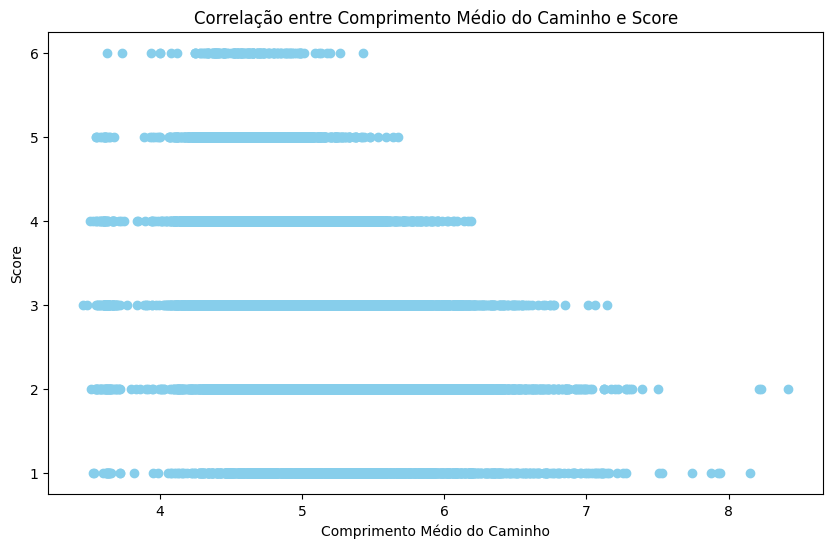

In [ ]:
# Visualizar a correlação com um gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(ds['comprimento_medio_caminho'], ds['score'], color='skyblue')
plt.xlabel('Comprimento Médio do Caminho')
plt.ylabel('Score')
plt.title('Correlação entre Comprimento Médio do Caminho e Score')
plt.show()

##Testando as correlações entre as features

Apesar de terem várias features com uma correlação forte com a target, várias delas possuem correlações altas entre elas mesmas. Assim, teremos que filtrar quais seriam melhores para entrar no nosso modelo.

<Axes: >

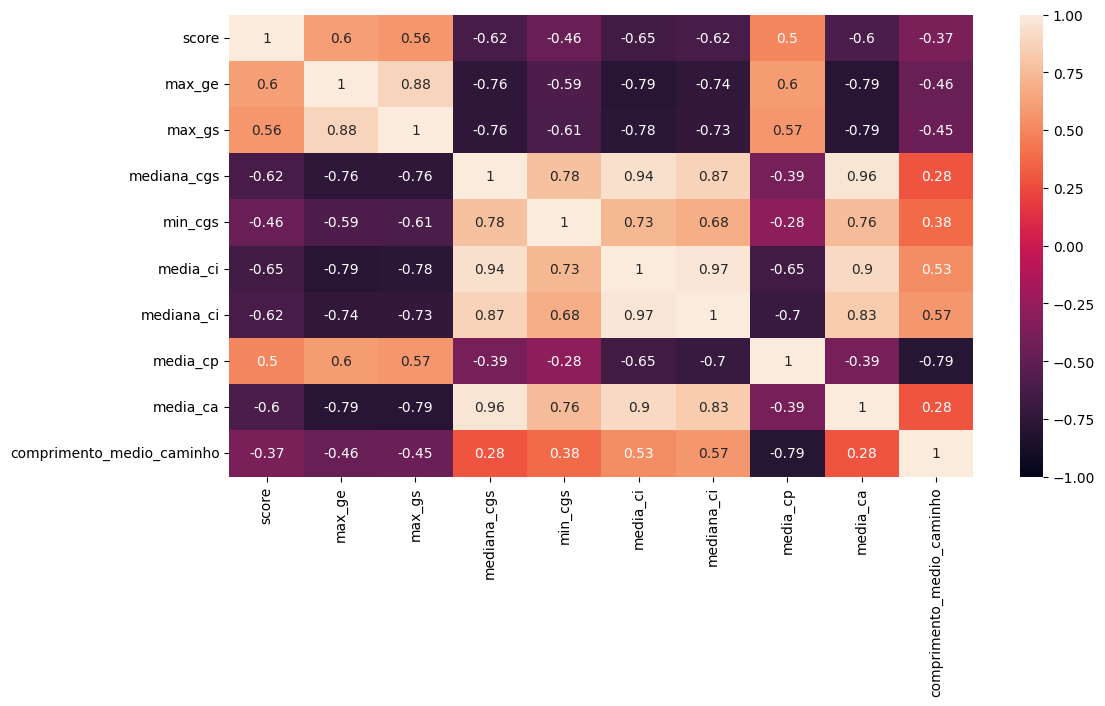

In [ ]:
plt.figure(figsize=[12,6])
sns.heatmap(ds.drop(['full_text', 'media_cge', 'mediana_cge', 'media_cgs', 'media_gs', 'densidade', 'media_ge'], axis=1).corr(), annot=True, vmin=-1, vmax=1)